In [ ]:
!pip install wbdata

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
import requests

from datetime import datetime

import wbdata

In [ ]:
indicators = {'Indicator Name': [
        'Gross Domestic Product (GDP)',
        'Gross National Income (GNI)',
        'Inflation rate',
        'Unemployment rate',
        'Poverty rate',
        'Life expectancy',
        'Literacy rate',
        'Access to electricity',
        'Mobile phone subscriptions',
        'Government expenditure on education',
        'Foreign direct investment (FDI)',
        'Exports of goods and services',
        'Imports of goods and services',
        'Gross capital formation',
        'Agricultural land area',
        'Agricultural production index'
    ],
    'Indicator ID': [
        'NY.GDP.MKTP.CD',
        'NY.GNP.MKTP.CD',
        'FP.CPI.TOTL.ZG',
        'SL.UEM.TOTL.ZS',
        'SI.POV.NAHC',
        'SP.DYN.LE00.IN',
        'SE.ADT.LITR.ZS',
        'EG.ELC.ACCS.ZS',
        'IT.CEL.SETS.P2',
        'SE.XPD.TOTL.GB.ZS',
        'BX.KLT.DINV.WD.GD.ZS',
        'NE.EXP.GNFS.ZS',
        'NE.IMP.GNFS.ZS',
        'NE.GDI.TOTL.ZS',
        'AG.LND.AGRI.ZS',
        'AG.PRD.FOOD.XD'
    ]
             }

In [ ]:
indicators = pd.DataFrame(indicators)
indicators

,Indicator Name,Indicator ID
0,Gross Domestic Product (GDP),NY.GDP.MKTP.CD
1,Gross National Income (GNI),NY.GNP.MKTP.CD
2,Inflation rate,FP.CPI.TOTL.ZG
3,Unemployment rate,SL.UEM.TOTL.ZS
4,Poverty rate,SI.POV.NAHC
5,Life expectancy,SP.DYN.LE00.IN
6,Literacy rate,SE.ADT.LITR.ZS
7,Access to electricity,EG.ELC.ACCS.ZS
8,Mobile phone subscriptions,IT.CEL.SETS.P2
9,Government expenditure on education,SE.XPD.TOTL.GB.ZS


In [ ]:
df = pd.DataFrame()
new_df = pd.DataFrame()
for i in indicators['Indicator ID']:
    new_df = wbdata.get_data(indicator=i, country='all', pandas=True)
    new_df = pd.DataFrame(new_df).reset_index()
    new_df.columns = ['country', 'date', indicators[indicators['Indicator ID'] == i]['Indicator Name'].values[0]]
    new_df = new_df[new_df['date'] >= '2015']
    new_df = new_df[new_df['date'] <= '2020']
    df = pd.concat([df, new_df], axis=1)
df

,country,date,Gross Domestic Product (GDP),country,date,Gross National Income (GNI),country,date,Inflation rate,country,...,Imports of goods and services,country,date,Gross capital formation,country,date,Agricultural land area,country,date,Agricultural production index
2,Africa Eastern and Southern,2020,9.275933e+11,Africa Eastern and Southern,2020,9.075397e+11,Africa Eastern and Southern,2020,7.321106,Africa Eastern and Southern,...,23.855003,Africa Eastern and Southern,2020,20.357183,Africa Eastern and Southern,2020,44.248721,Africa Eastern and Southern,2020,NaN
3,Africa Eastern and Southern,2019,1.000834e+12,Africa Eastern and Southern,2019,9.723981e+11,Africa Eastern and Southern,2019,4.653665,Africa Eastern and Southern,...,27.000821,Africa Eastern and Southern,2019,21.868426,Africa Eastern and Southern,2019,44.194846,Africa Eastern and Southern,2019,NaN
4,Africa Eastern and Southern,2018,1.007196e+12,Africa Eastern and Southern,2018,9.778204e+11,Africa Eastern and Southern,2018,4.720811,Africa Eastern and Southern,...,28.699467,Africa Eastern and Southern,2018,21.036979,Africa Eastern and Southern,2018,44.168345,Africa Eastern and Southern,2018,NaN
5,Africa Eastern and Southern,2017,1.021043e+12,Africa Eastern and Southern,2017,9.897903e+11,Africa Eastern and Southern,2017,6.399343,Africa Eastern and Southern,...,26.242349,Africa Eastern and Southern,2017,20.873019,Africa Eastern and Southern,2017,44.045088,Africa Eastern and Southern,2017,NaN
6,Africa Eastern and Southern,2016,8.851764e+11,Africa Eastern and Southern,2016,8.624134e+11,Africa Eastern and Southern,2016,6.571396,Africa Eastern and Southern,...,27.248678,Africa Eastern and Southern,2016,20.685884,Africa Eastern and Southern,2016,43.901452,Africa Eastern and Southern,2016,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16698,Zimbabwe,2019,2.183223e+10,Zimbabwe,2019,2.148784e+10,Zimbabwe,2019,255.304991,Zimbabwe,...,25.524111,Zimbabwe,2019,13.799352,Zimbabwe,2019,41.876696,Zimbabwe,2019,105.55
16699,Zimbabwe,2018,3.415607e+10,Zimbabwe,2018,3.344290e+10,Zimbabwe,2018,10.618866,Zimbabwe,...,28.386297,Zimbabwe,2018,14.148306,Zimbabwe,2018,41.876696,Zimbabwe,2018,108.86
16700,Zimbabwe,2017,1.758489e+10,Zimbabwe,2017,1.559375e+10,Zimbabwe,2017,0.893962,Zimbabwe,...,30.370807,Zimbabwe,2017,9.700147,Zimbabwe,2017,41.876696,Zimbabwe,2017,106.55
16701,Zimbabwe,2016,2.054868e+10,Zimbabwe,2016,1.800259e+10,Zimbabwe,2016,-1.543670,Zimbabwe,...,31.275493,Zimbabwe,2016,9.861371,Zimbabwe,2016,41.876696,Zimbabwe,2016,101.92


In [ ]:
df_1 = df.copy()
df_1 = df_1.drop(['country','date'],axis=1)
df_1 = pd.concat([df.iloc[:,0:2],df_1],axis=1)
df_1.head()

,country,date,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
2,Africa Eastern and Southern,2020,9.275933e+11,9.075397e+11,7.321106,7.631304,NaN,63.313860,71.889908,46.268621,71.060934,14.564090,1.391050,22.161854,23.855003,20.357183,44.248721,NaN
3,Africa Eastern and Southern,2019,1.000834e+12,9.723981e+11,4.653665,7.121663,NaN,63.755678,71.574051,44.389773,68.736999,15.352720,1.502827,23.890630,27.000821,21.868426,44.194846,NaN
4,Africa Eastern and Southern,2018,1.007196e+12,9.778204e+11,4.720811,6.913046,NaN,63.365863,70.420250,43.028332,72.317182,17.306705,1.345126,25.362832,28.699467,21.036979,44.168345,NaN
5,Africa Eastern and Southern,2017,1.021043e+12,9.897903e+11,6.399343,6.940365,NaN,62.922390,69.999451,40.197332,64.222619,17.150761,0.990504,22.297917,26.242349,20.873019,44.045088,NaN
6,Africa Eastern and Southern,2016,8.851764e+11,8.624134e+11,6.571396,6.855589,NaN,62.444050,70.059601,38.851444,64.284955,17.198811,1.890703,22.012799,27.248678,20.685884,43.901452,NaN


In [ ]:
countries=['Argentina', 'Australia','Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Republic of Korea', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 'Turkiye', 'United Kingdom', 'United States']

In [ ]:
dff = df_1[df_1['country'].isin(countries)]
dff.reset_index(drop=True, inplace=True)
dff

,country,date,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
0,Argentina,2020,3.855404e+11,3.755360e+11,NaN,11.460,42.0,75.892000,NaN,100.000000,121.600189,11.91690,1.224943,16.610872,13.608927,14.130595,39.603229,109.35
1,Argentina,2019,4.477547e+11,4.301668e+11,NaN,9.840,35.5,77.284000,NaN,100.000000,125.940981,12.53007,1.485007,17.924878,14.705737,14.210030,39.603229,112.59
2,Argentina,2018,5.248199e+11,5.060941e+11,NaN,9.220,32.0,76.999000,99.003868,99.993736,131.937169,12.52334,2.232532,14.436686,16.325850,16.613885,39.603229,97.49
3,Argentina,2017,6.436284e+11,6.272005e+11,NaN,8.350,25.7,76.833000,NaN,100.000000,140.501461,13.26392,1.789365,11.320283,13.969318,18.212567,40.647424,106.03
4,Argentina,2016,5.575323e+11,5.452516e+11,NaN,8.109,30.3,76.308000,99.125008,99.899742,145.917957,13.35554,0.584749,12.527095,13.566793,17.663228,41.716051,100.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,United States,2019,2.138098e+13,2.176454e+13,1.812210,3.670,NaN,78.787805,NaN,100.000000,106.414019,13.38055,1.472075,11.872470,14.579479,21.319232,44.363367,99.65
98,United States,2018,2.053306e+13,2.093736e+13,2.442583,3.900,NaN,78.639024,NaN,100.000000,104.847944,13.14618,1.045704,12.360989,15.249390,21.205917,44.363367,103.20
99,United States,2017,1.947734e+13,1.988555e+13,2.130110,4.360,NaN,78.539024,NaN,100.000000,103.129789,13.86467,1.955211,12.261738,15.017423,20.813431,44.363367,101.96
100,United States,2016,1.869511e+13,1.902048e+13,1.261583,4.870,NaN,78.539024,NaN,100.000000,103.370250,13.15421,2.537498,11.939539,14.647461,20.566778,44.303705,104.86


In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              102 non-null    object 
 1   date                                 102 non-null    object 
 2   Gross Domestic Product (GDP)         102 non-null    float64
 3   Gross National Income (GNI)          102 non-null    float64
 4   Inflation rate                       96 non-null     float64
 5   Unemployment rate                    102 non-null    float64
 6   Poverty rate                         37 non-null     float64
 7   Life expectancy                      102 non-null    float64
 8   Literacy rate                        30 non-null     float64
 9   Access to electricity                102 non-null    float64
 10  Mobile phone subscriptions           102 non-null    float64
 11  Government expenditure on educat

In [ ]:
dff['date'] = pd.to_datetime(dff['date'])

<ipython-input-10-d00cee6c4603>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['date'] = pd.to_datetime(dff['date'])


In [ ]:
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              102 non-null    object        
 1   date                                 102 non-null    datetime64[ns]
 2   Gross Domestic Product (GDP)         102 non-null    float64       
 3   Gross National Income (GNI)          102 non-null    float64       
 4   Inflation rate                       96 non-null     float64       
 5   Unemployment rate                    102 non-null    float64       
 6   Poverty rate                         37 non-null     float64       
 7   Life expectancy                      102 non-null    float64       
 8   Literacy rate                        30 non-null     float64       
 9   Access to electricity                102 non-null    float64       
 10  Mobile phone s

# Descriptive Summary

In [ ]:
dff.describe().T

,count,mean,std,min,25%,50%,75%,max
Gross Domestic Product (GDP),102.0,3.573779e+12,5.017679e+12,3.235855e+11,9.528127e+11,1.819425e+12,2.872879e+12,2.138098e+13
Gross National Income (GNI),102.0,3.599639e+12,5.096683e+12,3.152941e+11,9.223936e+11,1.795647e+12,2.855828e+12,2.176454e+13
Inflation rate,96.0,2.853051e+00,3.109839e+00,-2.093333e+00,1.026316e+00,1.948958e+00,3.643184e+00,1.633246e+01
Unemployment rate,102.0,7.762647e+00,5.079605e+00,2.350000e+00,4.337500e+00,5.960000e+00,9.922500e+00,2.554000e+01
Poverty rate,37.0,1.707568e+01,1.112965e+01,0.000000e+00,1.060000e+01,1.440000e+01,2.030000e+01,4.390000e+01
Life expectancy,102.0,7.743796e+01,5.241520e+00,6.395000e+01,7.450200e+01,7.765350e+01,8.190463e+01,8.456000e+01
Literacy rate,30.0,9.488450e+01,4.619322e+00,7.437299e+01,9.456912e+01,9.537844e+01,9.681622e+01,9.934910e+01
Access to electricity,102.0,9.855990e+01,3.807595e+00,8.390000e+01,9.970068e+01,1.000000e+02,1.000000e+02,1.000000e+02
Mobile phone subscriptions,102.0,1.165805e+02,2.220258e+01,7.567324e+01,9.754518e+01,1.168978e+02,1.308190e+02,1.669433e+02
Government expenditure on education,97.0,1.358730e+01,3.778289e+00,7.310000e+00,1.099916e+01,1.326392e+01,1.621811e+01,2.494862e+01


In [ ]:
dff['GDP_BN'] = dff['Gross Domestic Product (GDP)']/(10**9)
dff['GNI_BN'] = dff['Gross National Income (GNI)']/(10**9)
selected_cols = dff.columns[4:]
selected_cols

Index(['Inflation rate', 'Unemployment rate', 'Poverty rate',
       'Life expectancy', 'Literacy rate', 'Access to electricity',
       'Mobile phone subscriptions', 'Government expenditure on education',
       'Foreign direct investment (FDI)', 'Exports of goods and services',
       'Imports of goods and services', 'Gross capital formation',
       'Agricultural land area', 'Agricultural production index', 'GDP_BN',
       'GNI_BN'],
      dtype='object')

In [ ]:
dff[selected_cols].describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Inflation rate,96.0,3.0,3.0,-2.0,1.0,2.0,4.0,16.0
Unemployment rate,102.0,8.0,5.0,2.0,4.0,6.0,10.0,26.0
Poverty rate,37.0,17.0,11.0,0.0,11.0,14.0,20.0,44.0
Life expectancy,102.0,77.0,5.0,64.0,75.0,78.0,82.0,85.0
Literacy rate,30.0,95.0,5.0,74.0,95.0,95.0,97.0,99.0
Access to electricity,102.0,99.0,4.0,84.0,100.0,100.0,100.0,100.0
Mobile phone subscriptions,102.0,117.0,22.0,76.0,98.0,117.0,131.0,167.0
Government expenditure on education,97.0,14.0,4.0,7.0,11.0,13.0,16.0,25.0
Foreign direct investment (FDI),102.0,2.0,2.0,-1.0,1.0,2.0,3.0,12.0
Exports of goods and services,102.0,25.0,9.0,10.0,18.0,25.0,31.0,47.0


# Histogram

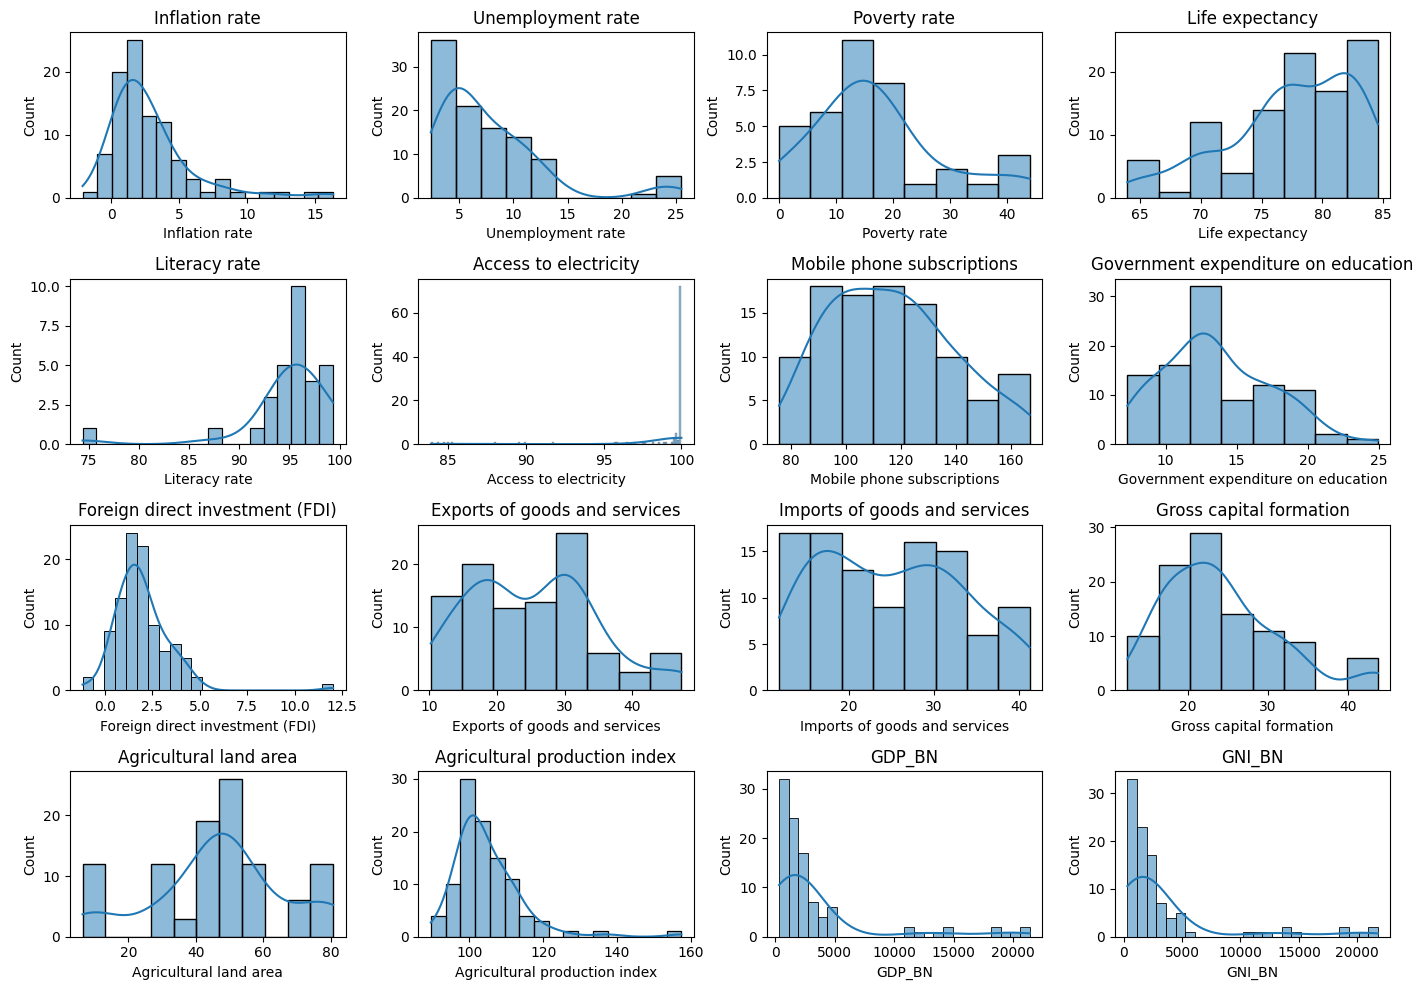

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14,10))
axs = axs.flatten()

for i, col in enumerate(selected_cols):
    sns.histplot(data=dff, x=col, kde=True, ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

In [ ]:
dff[selected_cols].skew().sort_values()

Literacy rate                         -3.264460
Access to electricity                 -2.953445
Life expectancy                       -0.771439
Agricultural land area                -0.246207
Imports of goods and services          0.235545
Mobile phone subscriptions             0.376188
Exports of goods and services          0.428365
Government expenditure on education    0.475650
Poverty rate                           0.882033
Gross capital formation                1.003803
Unemployment rate                      1.964813
Inflation rate                         2.161412
GDP_BN                                 2.456700
GNI_BN                                 2.470220
Agricultural production index          2.502468
Foreign direct investment (FDI)        2.850569
dtype: float64

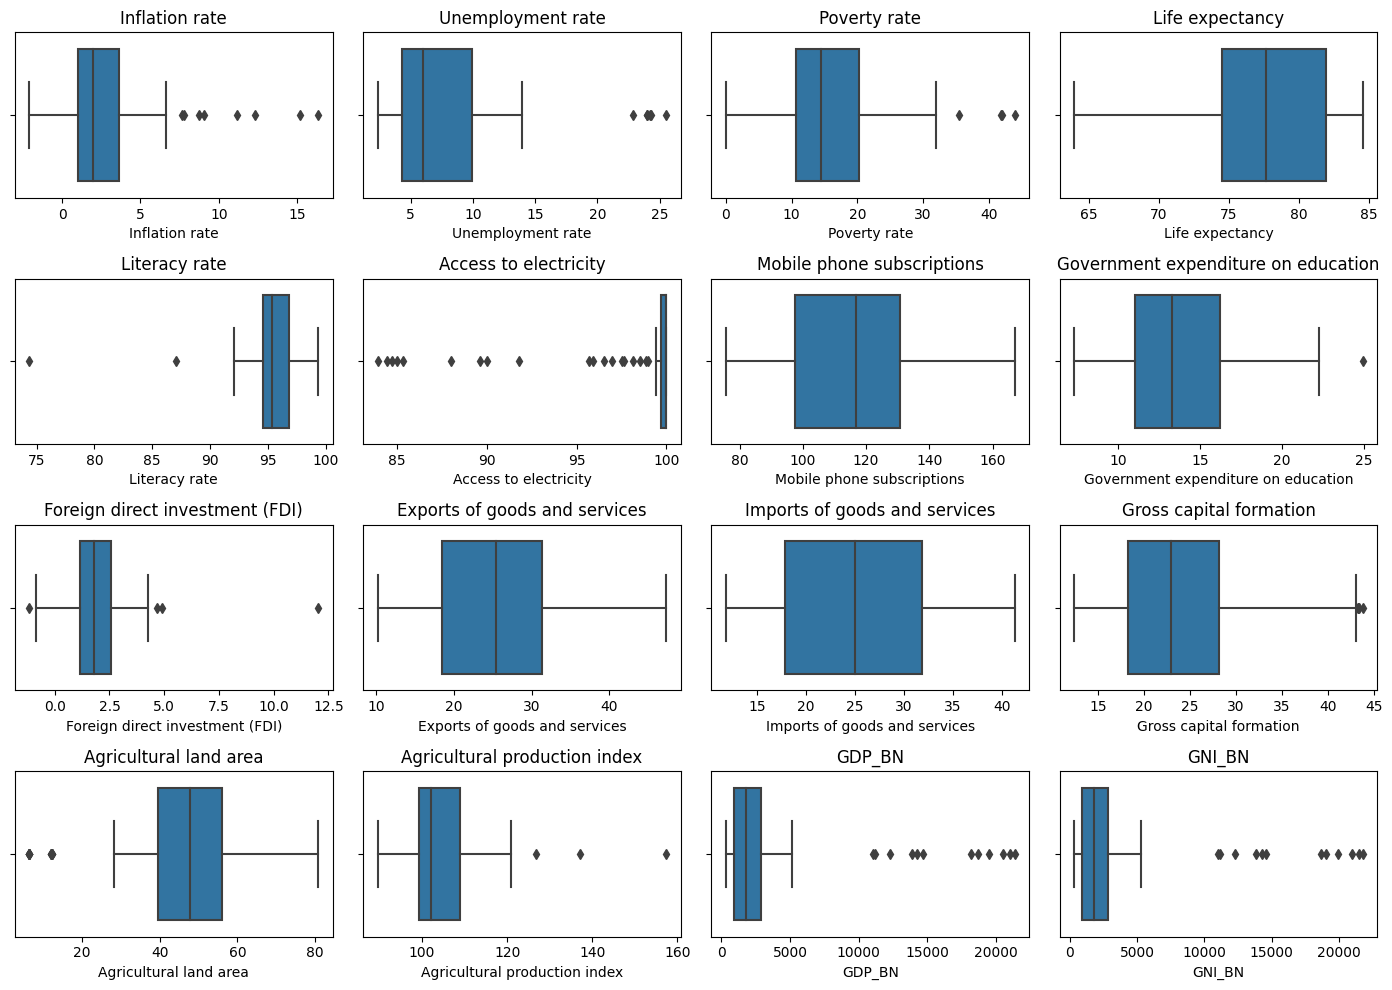

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14,10))
axs = axs.flatten()

for i, col in enumerate(selected_cols):
    sns.boxplot(data=dff, x=col, ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

# Outliers

In [ ]:
def outlier(x):
    q1=x.quantile(0.25)
    q3=x.quantile(0.75)
    iqr = q3 - q1
    return ( x < q1-1.5*iqr) | (x>q3+1.5*iqr)

In [ ]:
outlier_percentages = []

for col in selected_cols:
    x = dff[col]
    outliers = outlier(x)
    outlier_percentage = np.mean(outliers)*100
    outlier_percentages.append(outlier_percentage)


result_df = pd.DataFrame({'Column': selected_cols, 'Outlier Percentage': outlier_percentages})
result_df = result_df.sort_values('Outlier Percentage', ascending=False)

In [ ]:
result_df.round()

,Column,Outlier Percentage
5,Access to electricity,19.0
12,Agricultural land area,12.0
14,GDP_BN,12.0
15,GNI_BN,12.0
0,Inflation rate,8.0
1,Unemployment rate,6.0
2,Poverty rate,4.0
8,Foreign direct investment (FDI),4.0
11,Gross capital formation,4.0
13,Agricultural production index,3.0


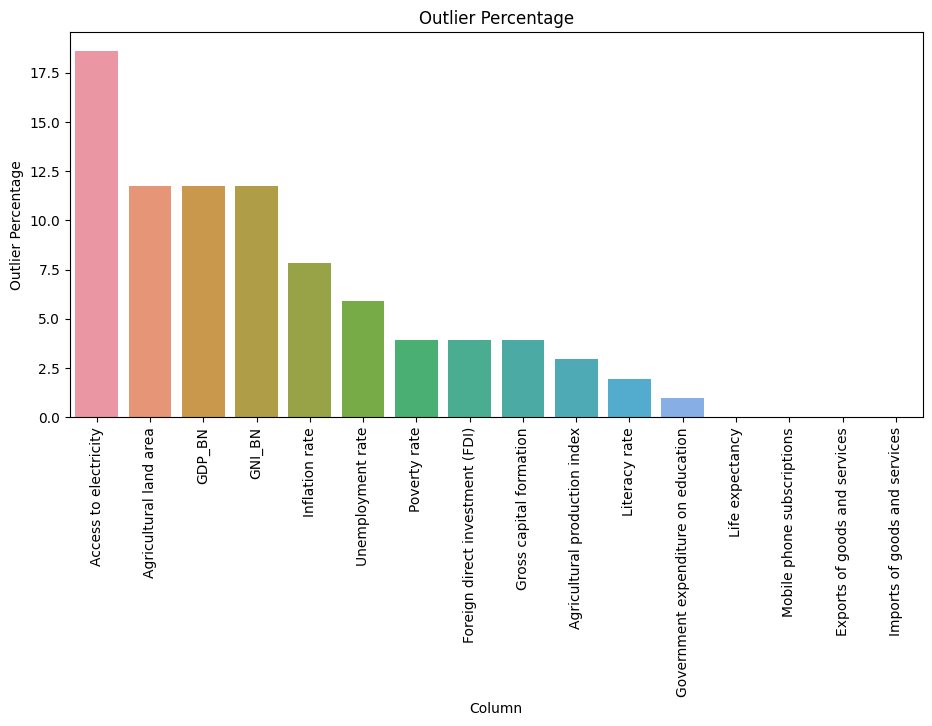

In [ ]:
plt.figure(figsize=(11,5))
sns.barplot(x=result_df['Column'], y=result_df['Outlier Percentage'])
plt.title("Outlier Percentage")
plt.xticks(rotation=90)
plt.show()

In [ ]:
dff.isnull().sum()

country                                 0
date                                    0
Gross Domestic Product (GDP)            0
Gross National Income (GNI)             0
Inflation rate                          6
Unemployment rate                       0
Poverty rate                           65
Life expectancy                         0
Literacy rate                          72
Access to electricity                   0
Mobile phone subscriptions              0
Government expenditure on education     5
Foreign direct investment (FDI)         0
Exports of goods and services           0
Imports of goods and services           0
Gross capital formation                 0
Agricultural land area                  0
Agricultural production index           0
GDP_BN                                  0
GNI_BN                                  0
dtype: int64

# Correlation

In [ ]:
dff.corr()

,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index,GDP_BN,GNI_BN
Gross Domestic Product (GDP),1.000000,0.999877,-0.220522,-0.303889,-0.611399,0.168080,0.046232,0.192103,-0.153412,-0.236174,-0.055173,-0.374605,-0.366622,0.257080,-0.049569,-0.176167,1.000000,0.999877
Gross National Income (GNI),0.999877,1.000000,-0.222861,-0.303931,-0.611649,0.171469,0.047621,0.192444,-0.149550,-0.238338,-0.058208,-0.373265,-0.365166,0.249727,-0.052970,-0.177546,0.999877,1.000000
Inflation rate,-0.220522,-0.222861,1.000000,0.362163,0.003216,-0.452413,-0.057579,-0.221841,-0.205852,0.256418,0.021407,-0.079740,0.000486,0.096622,0.084598,0.215174,-0.220522,-0.222861
Unemployment rate,-0.303889,-0.303931,0.362163,1.000000,0.284413,-0.507984,-0.169202,-0.704896,0.278397,0.244594,-0.172124,-0.040874,-0.045442,-0.398668,0.317747,0.076464,-0.303889,-0.303931
Poverty rate,-0.611399,-0.611649,0.003216,0.284413,1.000000,0.016431,0.118925,0.163630,0.084313,-0.073877,0.048699,0.203735,0.218959,-0.810913,-0.183260,0.145972,-0.611399,-0.611649
Life expectancy,0.168080,0.171469,-0.452413,-0.507984,0.016431,1.000000,0.445276,0.735267,-0.109543,-0.751602,0.074691,0.164173,0.145810,-0.086708,-0.385762,-0.311653,0.168080,0.171469
Literacy rate,0.046232,0.047621,-0.057579,-0.169202,0.118925,0.445276,1.000000,0.345698,0.234496,-0.323504,-0.059471,0.056215,-0.014891,-0.037361,-0.163344,-0.066947,0.046232,0.047621
Access to electricity,0.192103,0.192444,-0.221841,-0.704896,0.163630,0.735267,0.345698,1.000000,-0.272123,-0.453126,0.164288,0.032203,0.013416,0.104276,-0.415194,-0.002428,0.192103,0.192444
Mobile phone subscriptions,-0.153412,-0.149550,-0.205852,0.278397,0.084313,-0.109543,0.234496,-0.272123,1.000000,0.032196,-0.250235,-0.008846,-0.122771,-0.219369,0.178642,-0.165989,-0.153412,-0.149550
Government expenditure on education,-0.236174,-0.238338,0.256418,0.244594,-0.073877,-0.751602,-0.323504,-0.453126,0.032196,1.000000,0.031604,-0.068799,-0.065185,0.065274,0.455042,0.407413,-0.236174,-0.238338


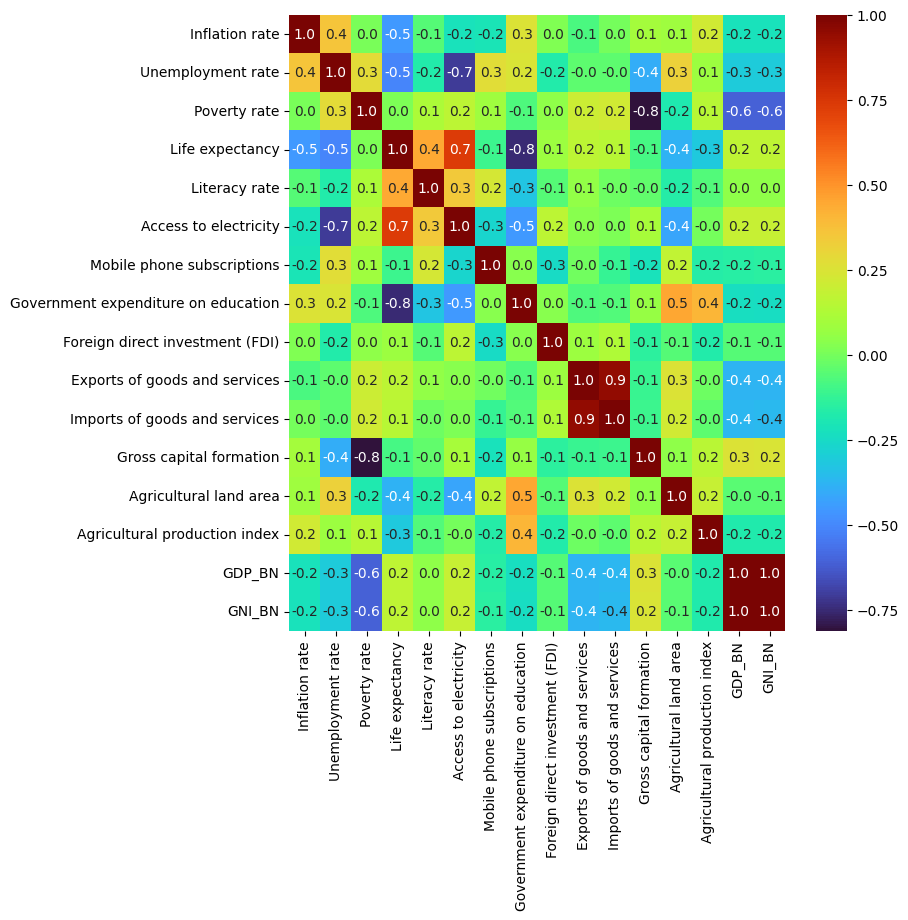

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(dff[selected_cols].corr(), annot=True, fmt='.1f', cmap='turbo')
plt.show()

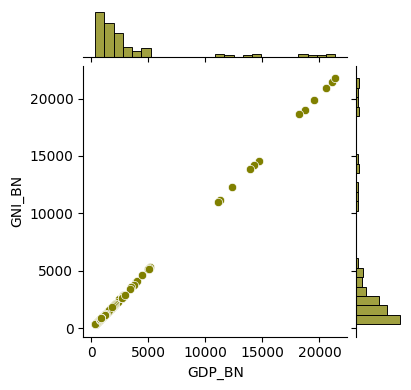

In [ ]:
sns.jointplot(x='GDP_BN', y='GNI_BN', data=dff, height=4, color='olive')
plt.show()

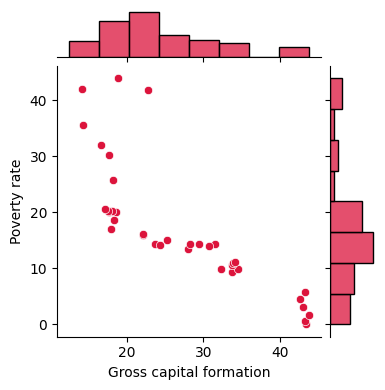

In [ ]:
sns.jointplot(x='Gross capital formation', y='Poverty rate', data=dff, height=4, color='crimson')
plt.show()

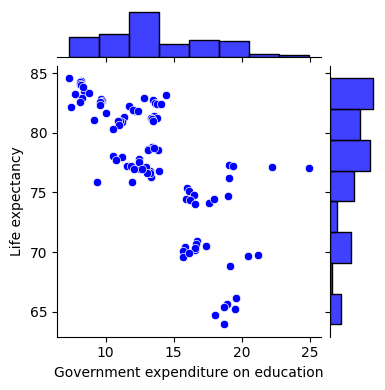

In [ ]:
sns.jointplot(x='Government expenditure on education', y='Life expectancy', data=dff, height=4, color='blue')
plt.show()

In [ ]:
def top_3(data, parameter):
    year_list = data['date'].dt.year.sort_values().unique()
    result_df = pd.DataFrame(columns=year_list,index=[1,2,3])

    for year in year_list:
        df_year = data[data['date'].dt.year == year]
        value = df_year.groupby('country')[parameter].sum().sort_values(ascending=False).head(3).index
        result_df[year] = value

    return result_df

In [ ]:
from IPython.display import display

In [ ]:
for i in selected_cols:
    result = top_3(dff,i)
    print(i)
    display(result)
    print('-------------------------------------------------')

Inflation rate


,2015,2016,2017,2018,2019,2020
1,Brazil,Brazil,Turkiye,Turkiye,Turkiye,Turkiye
2,Turkiye,Turkiye,Mexico,Mexico,South Africa,India
3,Indonesia,South Africa,South Africa,South Africa,Brazil,Saudi Arabia


-------------------------------------------------
Unemployment rate


,2015,2016,2017,2018,2019,2020
1,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa
2,Italy,Brazil,Brazil,Brazil,Turkiye,Brazil
3,France,Italy,Italy,Turkiye,Brazil,Turkiye


-------------------------------------------------
Poverty rate


,2015,2016,2017,2018,2019,2020
1,Italy,Argentina,Argentina,Mexico,Argentina,Mexico
2,Turkiye,Italy,Italy,Argentina,Italy,Argentina
3,Indonesia,United Kingdom,United Kingdom,Italy,Germany,Italy


-------------------------------------------------
Life expectancy


,2015,2016,2017,2018,2019,2020
1,Japan,Japan,Japan,Japan,Japan,Japan
2,Italy,Italy,Italy,Italy,Italy,Australia
3,Australia,France,France,Australia,Australia,Italy


-------------------------------------------------
Literacy rate


,2015,2016,2017,2018,2019,2020
1,Argentina,Argentina,Turkiye,Italy,Italy,Saudi Arabia
2,Turkiye,Turkiye,Saudi Arabia,Argentina,Turkiye,China
3,Indonesia,Indonesia,Mexico,China,South Africa,Indonesia


-------------------------------------------------
Access to electricity


,2015,2016,2017,2018,2019,2020
1,United States,United States,Argentina,United States,Argentina,Argentina
2,Saudi Arabia,United Kingdom,Australia,Japan,Australia,Australia
3,Canada,Canada,United Kingdom,United Kingdom,United Kingdom,United Kingdom


-------------------------------------------------
Mobile phone subscriptions


,2015,2016,2017,2018,2019,2020
1,Saudi Arabia,Indonesia,Indonesia,South Africa,South Africa,South Africa
2,South Africa,South Africa,South Africa,Japan,Japan,Japan
3,Italy,Argentina,Argentina,Italy,Italy,Indonesia


-------------------------------------------------
Government expenditure on education


,2015,2016,2017,2018,2019,2020
1,Indonesia,Saudi Arabia,Saudi Arabia,Saudi Arabia,South Africa,South Africa
2,Mexico,Indonesia,South Africa,South Africa,Saudi Arabia,Indonesia
3,South Africa,South Africa,Mexico,India,Indonesia,Saudi Arabia


-------------------------------------------------
Foreign direct investment (FDI)


,2015,2016,2017,2018,2019,2020
1,Canada,United Kingdom,United Kingdom,Australia,Brazil,United Kingdom
2,Brazil,Brazil,Australia,Germany,Canada,Germany
3,Australia,Mexico,Brazil,Brazil,Australia,Mexico


-------------------------------------------------
Exports of goods and services


,2015,2016,2017,2018,2019,2020
1,Germany,Germany,Germany,Germany,Germany,Germany
2,Mexico,Mexico,Mexico,Mexico,Mexico,Mexico
3,Saudi Arabia,Canada,Saudi Arabia,Saudi Arabia,Saudi Arabia,Canada


-------------------------------------------------
Imports of goods and services


,2015,2016,2017,2018,2019,2020
1,Germany,Mexico,Germany,Mexico,Germany,Mexico
2,Saudi Arabia,Germany,Mexico,Germany,Mexico,Germany
3,Mexico,Canada,Canada,Canada,Canada,Turkiye


-------------------------------------------------
Gross capital formation


,2015,2016,2017,2018,2019,2020
1,China,China,China,China,China,China
2,Saudi Arabia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia
3,Indonesia,Saudi Arabia,India,India,India,Turkiye


-------------------------------------------------
Agricultural land area


,2015,2016,2017,2018,2019,2020
1,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia
2,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa
3,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom


-------------------------------------------------
Agricultural production index


,2015,2016,2017,2018,2019,2020
1,Argentina,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia
2,Italy,Canada,Indonesia,Indonesia,India,Turkiye
3,France,United States,Turkiye,India,Turkiye,India


-------------------------------------------------
GDP_BN


,2015,2016,2017,2018,2019,2020
1,United States,United States,United States,United States,United States,United States
2,China,China,China,China,China,China
3,Japan,Japan,Japan,Japan,Japan,Japan


-------------------------------------------------
GNI_BN


,2015,2016,2017,2018,2019,2020
1,United States,United States,United States,United States,United States,United States
2,China,China,China,China,China,China
3,Japan,Japan,Japan,Japan,Japan,Japan


-------------------------------------------------


In [ ]:
dff['year_o'] = dff['date'].dt.year

# Life Expectancy

In [ ]:
life_expectancy = pd.pivot_table(columns='year_o', index='country', values='Life expectancy', data=dff, aggfunc='mean').round(1)
life_expectancy

year_o,2015,2016,2017,2018,2019,2020
country,,,,,,
Argentina,76.8,76.3,76.8,77.0,77.3,75.9
Australia,82.4,82.4,82.5,82.7,82.9,83.2
Brazil,74.3,74.4,74.8,75.1,75.3,74.0
Canada,81.8,81.9,81.8,81.8,82.2,81.7
China,77.0,77.2,77.2,77.7,78.0,78.1
France,82.3,82.6,82.6,82.7,82.8,82.2
Germany,80.6,81.0,81.0,80.9,81.3,81.0
India,69.6,70.1,70.5,70.7,70.9,70.2
Indonesia,69.7,69.8,69.9,70.3,70.5,68.8


In [ ]:
life_expectancy['perc_chg'] = round((life_expectancy[2020] - life_expectancy[2015])*100/life_expectancy[2015],1)
life_expectancy = life_expectancy.sort_values(ascending=False, by='perc_chg')
life_expectancy

year_o,2015,2016,2017,2018,2019,2020,perc_chg
country,,,,,,,
South Africa,64.0,64.7,65.4,65.7,66.2,65.3,2.0
China,77.0,77.2,77.2,77.7,78.0,78.1,1.4
Australia,82.4,82.4,82.5,82.7,82.9,83.2,1.0
Japan,83.8,84.0,84.1,84.2,84.4,84.6,1.0
India,69.6,70.1,70.5,70.7,70.9,70.2,0.9
Germany,80.6,81.0,81.0,80.9,81.3,81.0,0.5
Canada,81.8,81.9,81.8,81.8,82.2,81.7,-0.1
France,82.3,82.6,82.6,82.7,82.8,82.2,-0.1
Brazil,74.3,74.4,74.8,75.1,75.3,74.0,-0.4


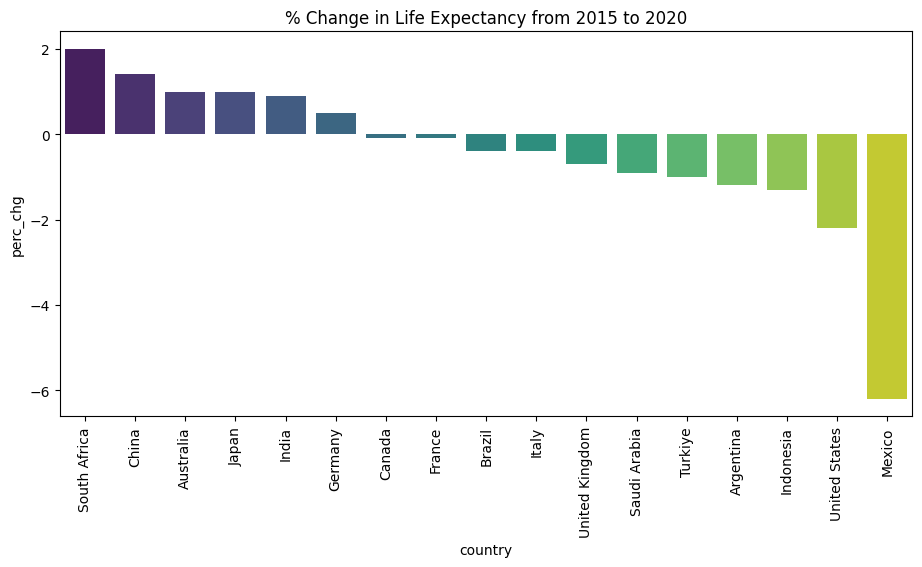

In [ ]:
plt.figure(figsize=(11,5))
sns.barplot(x=life_expectancy.index, y=life_expectancy['perc_chg'], palette='viridis')
plt.title("% Change in Life Expectancy from 2015 to 2020")
plt.xticks(rotation =90)
plt.show()

In [ ]:
fdi = pd.pivot_table(columns='year_o', index='country', values='Foreign direct investment (FDI)', data=dff, aggfunc='mean').round(1)
fdi['perc_chg'] = round((fdi[2020] - fdi[2015])*100/fdi[2015],1)
fdi = fdi.sort_values(ascending=False, by='perc_chg')
fdi

year_o,2015,2016,2017,2018,2019,2020,perc_chg
country,,,,,,,
Japan,0.1,0.8,0.4,0.5,0.8,1.2,1100.0
United Kingdom,1.5,12.0,4.7,-0.9,0.7,4.9,226.7
South Africa,0.4,0.7,0.5,1.4,1.3,0.9,125.0
Germany,1.9,1.9,3.0,4.2,1.9,4.1,115.8
India,2.1,1.9,1.5,1.6,1.8,2.4,14.3
Mexico,3.1,3.6,2.9,3.1,2.4,2.9,-6.5
Indonesia,2.3,0.5,2.0,1.8,2.2,1.8,-21.7
China,2.2,1.6,1.3,1.7,1.3,1.7,-22.7
Brazil,3.6,4.1,3.3,4.1,3.7,2.6,-27.8


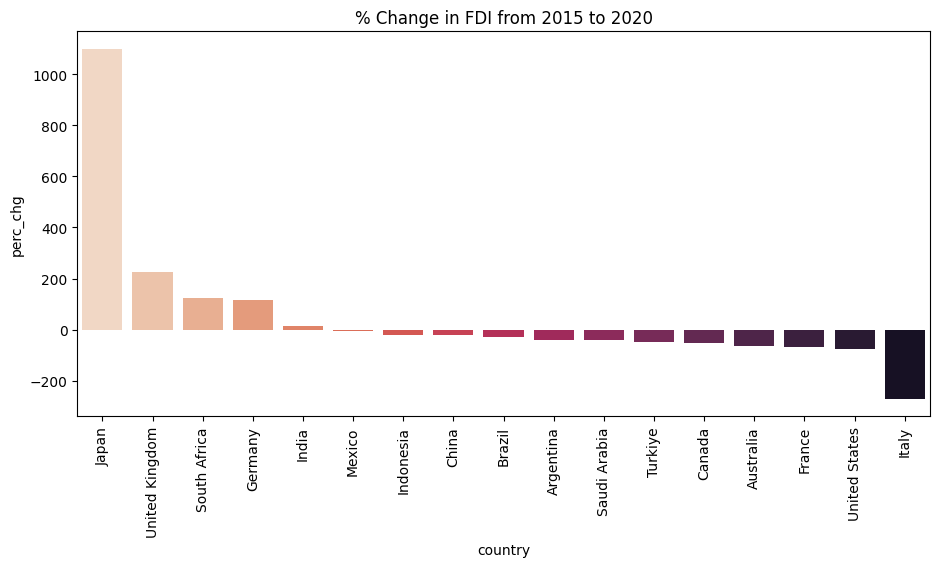

In [ ]:
plt.figure(figsize=(11,5))
sns.barplot(x=fdi.index, y=fdi['perc_chg'], palette='rocket_r')
plt.title("% Change in FDI from 2015 to 2020")
plt.xticks(rotation =90)
plt.show()

# Exports and Importations

In [ ]:
dff['net_exim_bal'] = dff['Exports of goods and services'] - dff['Imports of goods and services']
exim = pd.pivot_table(index='country', columns='date', values='net_exim_bal', aggfunc='mean', data=dff).round(2)
exim

date,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01
country,,,,,,
Argentina,-1.07,-1.04,-2.65,-1.89,3.22,3.00
Australia,-1.49,-2.28,0.51,0.36,2.48,3.78
Brazil,-1.15,0.40,0.72,0.39,-0.64,0.61
Canada,-2.46,-2.36,-2.19,-1.95,-1.47,-2.24
China,3.24,2.27,1.75,0.66,0.93,2.42
France,-0.57,-0.61,-1.06,-1.01,-0.96,-1.96
Germany,7.60,7.38,7.09,6.10,5.65,5.63
India,-2.30,-1.77,-3.16,-3.76,-2.58,-0.39
Indonesia,0.38,0.76,1.00,-1.07,-0.44,1.69


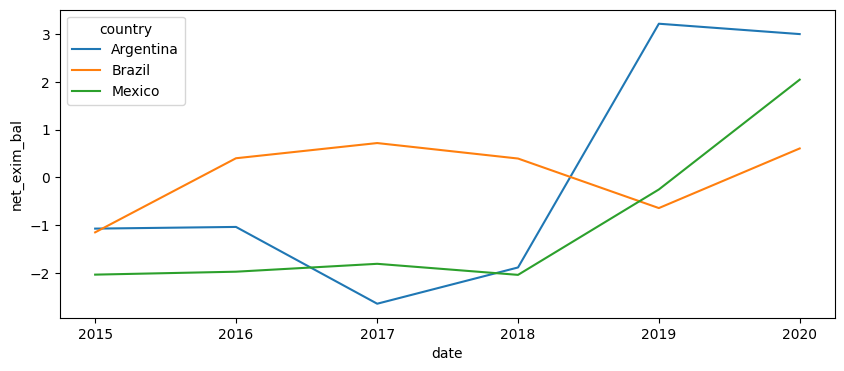

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(x='date', y='net_exim_bal', data=dff[dff['country'].isin(['Argentina', 'Brazil','Mexico'])], hue='country', ci=False)
plt.show()

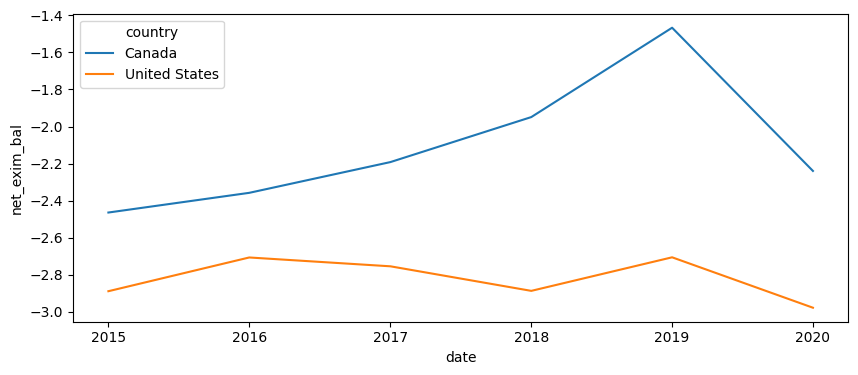

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(x='date', y='net_exim_bal', data=dff[dff['country'].isin(['Canada','United States'])], hue='country', ci=False)
plt.show()